In [1]:
import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
import itertools

mat_filename_grid= "./SQ_grid_fg.mat"

In [2]:
data_grid = loadmat(mat_filename_grid)

In [3]:
parameters_list = data_grid["parameters_list"]
SQ_list = data_grid["SQ_list"]

uniq_params_0 = np.unique(parameters_list[:,0])
uniq_params_1 = np.unique(parameters_list[:,1])
uniq_params_2 = np.unique(parameters_list[:,2])

In [4]:
uniq_params_1 

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 ])

In [5]:
def id_params(parameters):
    tol = 1e-6
    id_eta = np.abs(parameters_list[:,0]-parameters[0])<tol
    id_kappa = np.abs(parameters_list[:,1]-parameters[1])<tol
    id_A = np.abs(parameters_list[:,2]-parameters[2])<tol
    return np.where(id_eta*id_kappa*id_A)[0]

[1017]
[1018]
[1019]


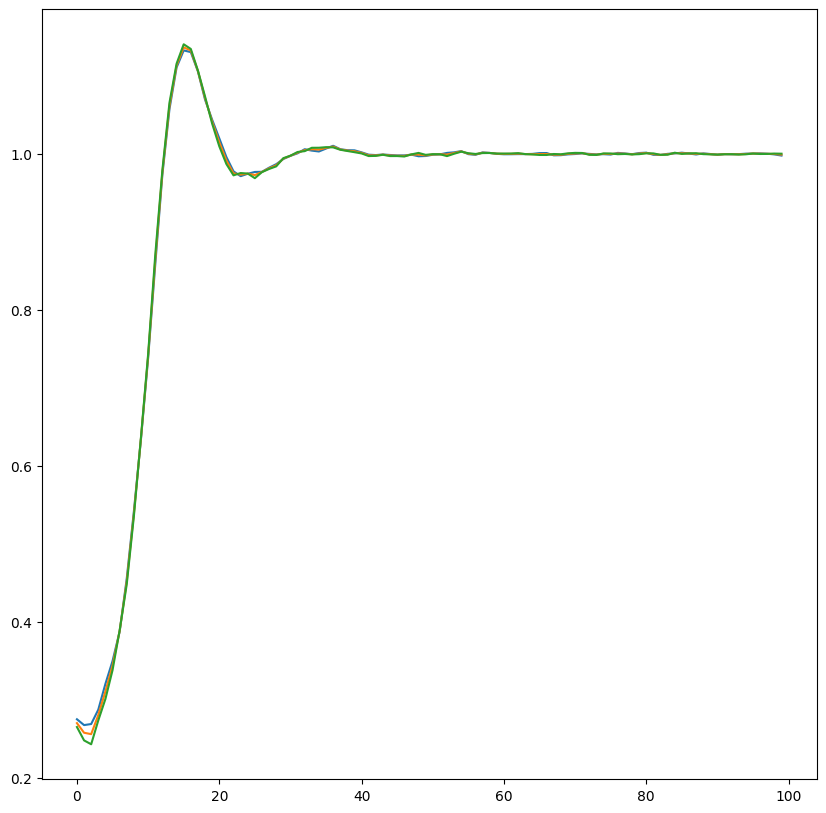

In [6]:
params = np.array([[0.03,0.32,18],[0.03,0.32,19],[0.03,0.32,20]])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for p in params:
    index = id_params(p)
    print(index)
    ax.plot(SQ_list[index,:][0])

In [28]:
SQ_list[1018,:] = (SQ_list[1017,:]+SQ_list[1019,:])/2

In [32]:
mdic = {"parameters_list":parameters_list, "SQ_list":SQ_list}
savemat("SQ_grid_fg.mat",mdic)